In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pymysql
from sqlalchemy import create_engine
import getpass  
password = getpass.getpass()

········


In [2]:
data = pd.read_csv("wh_staff_dataset.csv")

In [3]:
data.head(1)

,year,name,gender,status,salary,pay_basis,position_title
0,1997,"Abedin,Huma M.",Female,Employee,27500.0,Per Annum,OFFICE MANAGER


In [4]:
data = data[["name","year","position_title", "gender", "status","pay_basis", "salary"]]

In [5]:
data.head(60)

,name,year,position_title,gender,status,pay_basis,salary
0,"Abedin,Huma M.",1997,OFFICE MANAGER,Female,Employee,Per Annum,27500.0
1,"Abrams,Lori E.",1997,"DEPUTY DIRECTOR, WHITE HOUSE GIFTS",Female,Employee,Per Annum,35000.0
2,"Alcorn,Brian A.",1997,ASSISTANT DIRECTOR FOR ADVANCE,Male,Employee,Per Annum,25000.0
3,"Allen,Jeannetta Pam",1997,STAFF ASSISTANT,Female,Employee,Per Annum,22000.0
4,"Allison,Donna Tate",1997,WHITE HOUSE TELEPHONE OPERATOR,Female,Employee,Per Annum,27624.0
5,"Alston,Mildred C.",1997,SPECIAL ASSISTANT PERSONAL CORRESPONDENCE,Female,Employee,Per Annum,47000.0
6,"Alterescu,Louis",1997,ATTORNEY - ADVISOR,Male,Detailee,Per Annum,73163.0
7,"Amador,Patricia",1997,ATTORNEY - ADVISOR,Female,Detailee,Per Annum,54629.0
8,"Amorsingh,Lucius Linus",1997,WHITE HOUSE TELEPHONE OPERATOR,Male,Employee,Per Annum,24858.0
9,"Anders,Brenda",1997,RADIO COORDINATOR,Female,Employee,Per Annum,31000.0


In [6]:
data.dtypes

name               object
year                int64
position_title     object
gender             object
status             object
pay_basis          object
salary            float64
dtype: object

In [7]:
data.shape

(10600, 7)

In [8]:
data.isna().sum()

name              3
year              0
position_title    2
gender            3
status            0
pay_basis         7
salary            5
dtype: int64

# Dealing with NaNs in gender and Salary column

In [9]:
data['gender'].value_counts(dropna=False)

Female    5595
Male      5002
NaN          3
Name: gender, dtype: int64

In [10]:
data['gender'] = data['gender'].fillna('Female')

In [11]:
data['gender'].value_counts(dropna=False)

Female    5598
Male      5002
Name: gender, dtype: int64

##### For salary

In [12]:
mean__salary = data['salary'].mean()

In [13]:
mean__salary

75185.34063237376

In [14]:
data['salary'] = data['salary'].fillna(mean__salary)

###### For pay basis

In [15]:
data['pay_basis'].value_counts(dropna=False)

Per Annum    10589
NaN              7
Per Diem         4
Name: pay_basis, dtype: int64

In [16]:
data['pay_basis'] = data['pay_basis'].fillna('Per Annum')

##### For position_title

In [17]:
len(data['position_title'].unique())

2397

In [18]:
data['position_title'].value_counts(dropna=False).head(20)

STAFF ASSISTANT                                                              623
ASSOCIATE DIRECTOR                                                           364
RECORDS MANAGEMENT ANALYST                                                   288
DEPUTY ASSOCIATE DIRECTOR                                                    220
EXECUTIVE ASSISTANT                                                          210
ASSOCIATE COUNSEL TO THE PRESIDENT                                           167
SPECIAL ASSISTANT TO THE PRESIDENT FOR LEGISLATIVE AFFAIRS                   163
SPECIAL ASSISTANT                                                            149
INFORMATION SERVICES OPERATOR                                                122
CORRESPONDENCE ANALYST                                                       102
ANALYST                                                                       99
SENIOR POLICY ADVISOR                                                         84
SPECIAL ASSISTANT TO THE PRE

In [19]:
data['position_title'] = data['position_title'].fillna('STAFF ASSISTANT')

##### For name

In [20]:
data['name'].value_counts(dropna=False)

McCathran,William W.      24
Trainor,Gregory T.        24
Kalbaugh,David E.         24
Williams,Sherman A.       24
Thomas,Edwin R.,III       24
                          ..
Albright,Craig M.          1
Amin,Vishal J.             1
Andrews,Alexandra S.       1
Avery,Tyson Mcallister     1
Yanick,Brittany M.         1
Name: name, Length: 4659, dtype: int64

In [21]:
 data = data.dropna()
data.shape

(10597, 7)

In [22]:
data.isna().sum()


name              0
year              0
position_title    0
gender            0
status            0
pay_basis         0
salary            0
dtype: int64

# Categorizing each worker to Administration under which they served

In [23]:

def admin(x):
    if x <2001:
        return 'Clinton Administration'
    elif x< 2009:
        return 'Bush administration'
    elif x <2017:
        return "Obama Administration"
    else:
        return 'Trump Administration'

In [24]:
data['served_under'] = data["year"].apply(admin)

In [25]:
data = data[["name","year","served_under","position_title", "gender", "status","pay_basis", "salary"]]

In [26]:
data

,name,year,served_under,position_title,gender,status,pay_basis,salary
0,"Abedin,Huma M.",1997,Clinton Administration,OFFICE MANAGER,Female,Employee,Per Annum,27500.0
1,"Abrams,Lori E.",1997,Clinton Administration,"DEPUTY DIRECTOR, WHITE HOUSE GIFTS",Female,Employee,Per Annum,35000.0
2,"Alcorn,Brian A.",1997,Clinton Administration,ASSISTANT DIRECTOR FOR ADVANCE,Male,Employee,Per Annum,25000.0
3,"Allen,Jeannetta Pam",1997,Clinton Administration,STAFF ASSISTANT,Female,Employee,Per Annum,22000.0
4,"Allison,Donna Tate",1997,Clinton Administration,WHITE HOUSE TELEPHONE OPERATOR,Female,Employee,Per Annum,27624.0
...,...,...,...,...,...,...,...,...
10595,"Young,Stewart B.",2020,Trump Administration,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...,Male,Employee,Per Annum,120000.0
10596,"Zadrozny,John A.",2020,Trump Administration,DEPUTY ASSISTANT TO THE PRESIDENT AND ADVISOR ...,Male,Employee,Per Annum,158000.0
10597,"Zakaria,Hannah",2020,Trump Administration,ASSOCIATE LOGISTICS AND OPERATIONS MANAGER,Female,Employee,Per Annum,53000.0
10598,"Ziegler,Garrett M.",2020,Trump Administration,SENIOR POLICY ANALYST,Male,Employee,Per Annum,53000.0


# Export your cleaned data to mysql

In [27]:
connection_string = 'mysql+pymysql://root:' + password + '@localhost/mid_bootcamp_project'
engine = create_engine(connection_string)

In [28]:
data.to_sql(name='whitehouse', con=engine, schema=None, if_exists= 'replace', index=False, index_label=None,
          chunksize=None, dtype=None, method=None)

10597

In [29]:
query = """SELECT * FROM whitehouse;"""
data = pd.read_sql_query(query, engine)
data

,name,year,served_under,position_title,gender,status,pay_basis,salary
0,"Abedin,Huma M.",1997,Clinton Administration,OFFICE MANAGER,Female,Employee,Per Annum,27500.0
1,"Abrams,Lori E.",1997,Clinton Administration,"DEPUTY DIRECTOR, WHITE HOUSE GIFTS",Female,Employee,Per Annum,35000.0
2,"Alcorn,Brian A.",1997,Clinton Administration,ASSISTANT DIRECTOR FOR ADVANCE,Male,Employee,Per Annum,25000.0
3,"Allen,Jeannetta Pam",1997,Clinton Administration,STAFF ASSISTANT,Female,Employee,Per Annum,22000.0
4,"Allison,Donna Tate",1997,Clinton Administration,WHITE HOUSE TELEPHONE OPERATOR,Female,Employee,Per Annum,27624.0
...,...,...,...,...,...,...,...,...
10592,"Young,Stewart B.",2020,Trump Administration,SPECIAL ASSISTANT TO THE PRESIDENT AND DIRECTO...,Male,Employee,Per Annum,120000.0
10593,"Zadrozny,John A.",2020,Trump Administration,DEPUTY ASSISTANT TO THE PRESIDENT AND ADVISOR ...,Male,Employee,Per Annum,158000.0
10594,"Zakaria,Hannah",2020,Trump Administration,ASSOCIATE LOGISTICS AND OPERATIONS MANAGER,Female,Employee,Per Annum,53000.0
10595,"Ziegler,Garrett M.",2020,Trump Administration,SENIOR POLICY ANALYST,Male,Employee,Per Annum,53000.0


# Analysis

# Staff who worked through all administrations

In [30]:
data.name.unique()

array(['Abedin,Huma M.', 'Abrams,Lori E.', 'Alcorn,Brian A.', ...,
       'Williams,James H.', 'Williamson,Benjamin D.',
       'Yanick,Brittany M.'], dtype=object)

In [31]:
len(data[data["name"]=="Zakaria,Hannah"]["served_under"].unique())

1

In [32]:
served_all4admin = []
for x in data.name.unique():
    president = len(data[data["name"]==x]["served_under"].unique())
    if president ==4:
        served_all4admin.append(x)
        
        
print(served_all4admin)
len(served_all4admin)
        

    
    

['Campbell,Frances L.', 'Droege,Philip C.', 'Jones,Crystal B.', 'Kalbaugh,David E.', 'McCathran,William W.', 'Roddick,Gertrude A.', 'Thomas,Edwin R.,III', 'Trainor,Gregory T.', 'Tucker,Phyllis J.', 'Williams,Sherman A.', 'DeGuzman,Danilo,Jr.', 'Brooke,Mary J.', 'King,Taeshonnda Cheralyn']


13

In [33]:
served_all4admin = pd.DataFrame(served_all4admin)
served_all4admin.head(1)

,0
0,"Campbell,Frances L."


In [34]:
served_all4admin = served_all4admin.rename(columns={0:"name"})
served_all4admin

,name
0,"Campbell,Frances L."
1,"Droege,Philip C."
2,"Jones,Crystal B."
3,"Kalbaugh,David E."
4,"McCathran,William W."
5,"Roddick,Gertrude A."
6,"Thomas,Edwin R.,III"
7,"Trainor,Gregory T."
8,"Tucker,Phyllis J."
9,"Williams,Sherman A."


In [35]:
served_all4admin = pd.merge(served_all4admin, data,how="inner",on = "name" )

In [36]:
served_all4admin

,name,year,served_under,position_title,gender,status,pay_basis,salary
0,"Campbell,Frances L.",1997,Clinton Administration,SUPERVISOR DATA ENTRY UNIT,Female,Employee,Per Annum,44719.0
1,"Campbell,Frances L.",1998,Clinton Administration,SUPERVISOR DATA ENTRY UNIT,Female,Employee,Per Annum,48635.0
2,"Campbell,Frances L.",1999,Clinton Administration,SUPERVISOR DATA ENTRY UNIT,Female,Employee,Per Annum,52049.0
3,"Campbell,Frances L.",2000,Clinton Administration,SUPERVISOR DATA ENTRY UNIT,Female,Employee,Per Annum,56324.0
4,"Campbell,Frances L.",2001,Bush administration,"SUPERVISOR, DATA ENTRY UNIT",Female,Employee,Per Annum,58470.0
...,...,...,...,...,...,...,...,...
292,"King,Taeshonnda Cheralyn",2016,Obama Administration,RECORDS MANAGEMENT ANALYST,Female,Employee,Per Annum,65899.0
293,"King,Taeshonnda Cheralyn",2017,Trump Administration,RECORDS MANAGEMENT ANALYST,Female,Employee,Per Annum,69100.0
294,"King,Taeshonnda Cheralyn",2018,Trump Administration,SENIOR RECORDS MANAGEMENT ANALYST,Female,Employee,Per Annum,74000.0
295,"King,Taeshonnda Cheralyn",2019,Trump Administration,SENIOR RECORDS MANAGEMENT ANALYST,Female,Employee,Per Annum,75400.0


In [37]:
served_all4admin["name"].unique()

array(['Campbell,Frances L.', 'Droege,Philip C.', 'Jones,Crystal B.',
       'Kalbaugh,David E.', 'McCathran,William W.', 'Roddick,Gertrude A.',
       'Thomas,Edwin R.,III', 'Trainor,Gregory T.', 'Tucker,Phyllis J.',
       'Williams,Sherman A.', 'DeGuzman,Danilo,Jr.', 'Brooke,Mary J.',
       'King,Taeshonnda Cheralyn'], dtype=object)

In [38]:
served_all4admin_2017 = served_all4admin[served_all4admin["year"]==2017]
served_all4admin_2017


,name,year,served_under,position_title,gender,status,pay_basis,salary
20,"Campbell,Frances L.",2017,Trump Administration,SUPERVISOR FOR DOCUMENT MANAGEMENT AND TRACKIN...,Female,Employee,Per Annum,113755.0
42,"Droege,Philip C.",2017,Trump Administration,DIRECTOR OF RECORDS MANAGEMENT,Male,Employee,Per Annum,153730.0
66,"Jones,Crystal B.",2017,Trump Administration,ASSISTANT SUPERVISOR FOR DOCUMENT MANAGEMENT A...,Female,Employee,Per Annum,98323.0
87,"Kalbaugh,David E.",2017,Trump Administration,EXECUTIVE CLERK,Male,Employee,Per Annum,153730.0
111,"McCathran,William W.",2017,Trump Administration,ASSISTANT EXECUTIVE CLERK,Male,Employee,Per Annum,116914.0
135,"Roddick,Gertrude A.",2017,Trump Administration,PRESIDENTIAL SUPPORT SPECIALIST,Female,Employee,Per Annum,100981.0
157,"Thomas,Edwin R.,III",2017,Trump Administration,ASSISTANT EXECUTIVE CLERK FOR MESSAGES AND EXE...,Male,Employee,Per Annum,119489.0
181,"Trainor,Gregory T.",2017,Trump Administration,DIRECTOR OF SPECIAL PROJECTS FOR CORRESPONDENCE,Male,Employee,Per Annum,76685.0
205,"Tucker,Phyllis J.",2017,Trump Administration,SUPERVISOR OF COMPUTER ADMINISTRATION FOR RECO...,Female,Employee,Per Annum,107435.0
227,"Williams,Sherman A.",2017,Trump Administration,ASSISTANT TO THE EXECUTIVE CLERK,Male,Employee,Per Annum,90350.0


In [39]:
served_all4admin_2000 =served_all4admin[served_all4admin["year"]==2000]
served_all4admin_2000


,name,year,served_under,position_title,gender,status,pay_basis,salary
3,"Campbell,Frances L.",2000,Clinton Administration,SUPERVISOR DATA ENTRY UNIT,Female,Employee,Per Annum,56324.0
25,"Droege,Philip C.",2000,Clinton Administration,RECORDS MANAGEMENT ANALYST,Male,Employee,Per Annum,44148.0
49,"Jones,Crystal B.",2000,Clinton Administration,RECORDS MANAGEMENT ANALYST,Female,Employee,Per Annum,44071.0
70,"Kalbaugh,David E.",2000,Clinton Administration,DEPUTY EXECUTIVE CLERK,Male,Employee,Per Annum,62920.0
94,"McCathran,William W.",2000,Clinton Administration,ASSISTANT EXECUTIVE CLERK,Male,Employee,Per Annum,56324.0
118,"Roddick,Gertrude A.",2000,Clinton Administration,"DEPUTY DIRECTOR, MAIL ANALYSIS",Female,Employee,Per Annum,40182.0
140,"Thomas,Edwin R.,III",2000,Clinton Administration,ASSISTANT TO THE EXECUTIVE CLERK,Male,Employee,Per Annum,49845.0
164,"Trainor,Gregory T.",2000,Clinton Administration,CORRESPONDENCE ANALYST,Male,Employee,Per Annum,36230.0
188,"Tucker,Phyllis J.",2000,Clinton Administration,RECORDS MANAGEMENT ANALYST,Female,Employee,Per Annum,44071.0
210,"Williams,Sherman A.",2000,Clinton Administration,ASSISTANT TO THE EXECUTIVE CLERK,Male,Employee,Per Annum,38885.0


In [40]:
served_all4admin_2000[["year", "position_title", "salary"]]

,year,position_title,salary
3,2000,SUPERVISOR DATA ENTRY UNIT,56324.0
25,2000,RECORDS MANAGEMENT ANALYST,44148.0
49,2000,RECORDS MANAGEMENT ANALYST,44071.0
70,2000,DEPUTY EXECUTIVE CLERK,62920.0
94,2000,ASSISTANT EXECUTIVE CLERK,56324.0
118,2000,"DEPUTY DIRECTOR, MAIL ANALYSIS",40182.0
140,2000,ASSISTANT TO THE EXECUTIVE CLERK,49845.0
164,2000,CORRESPONDENCE ANALYST,36230.0
188,2000,RECORDS MANAGEMENT ANALYST,44071.0
210,2000,ASSISTANT TO THE EXECUTIVE CLERK,38885.0


In [41]:
served_all4admin_2017[["name", "year", "position_title", "gender", "salary"]]

,name,year,position_title,gender,salary
20,"Campbell,Frances L.",2017,SUPERVISOR FOR DOCUMENT MANAGEMENT AND TRACKIN...,Female,113755.0
42,"Droege,Philip C.",2017,DIRECTOR OF RECORDS MANAGEMENT,Male,153730.0
66,"Jones,Crystal B.",2017,ASSISTANT SUPERVISOR FOR DOCUMENT MANAGEMENT A...,Female,98323.0
87,"Kalbaugh,David E.",2017,EXECUTIVE CLERK,Male,153730.0
111,"McCathran,William W.",2017,ASSISTANT EXECUTIVE CLERK,Male,116914.0
135,"Roddick,Gertrude A.",2017,PRESIDENTIAL SUPPORT SPECIALIST,Female,100981.0
157,"Thomas,Edwin R.,III",2017,ASSISTANT EXECUTIVE CLERK FOR MESSAGES AND EXE...,Male,119489.0
181,"Trainor,Gregory T.",2017,DIRECTOR OF SPECIAL PROJECTS FOR CORRESPONDENCE,Male,76685.0
205,"Tucker,Phyllis J.",2017,SUPERVISOR OF COMPUTER ADMINISTRATION FOR RECO...,Female,107435.0
227,"Williams,Sherman A.",2017,ASSISTANT TO THE EXECUTIVE CLERK,Male,90350.0


# staff with the highest Salary is Male

In [42]:
data['salary'].max()

239595.0

In [43]:
data[data['salary']== data['salary'].max()]

,name,year,served_under,position_title,gender,status,pay_basis,salary
9846,"Czwartacki,John S.",2019,Trump Administration,SENIOR ADVISOR TO THE CHIEF OF STAFF FOR STRAT...,Male,Detailee,Per Annum,239595.0


# 95Th Percentile(TOp  Whitehouse Staff Salaries)

In [44]:
percentile_95th =data[data["salary"] >np.percentile(data['salary'],95)]
percentile_95th
percentile_95th["gender"].value_counts()


Male      343
Female    163
Name: gender, dtype: int64

# 10Th Percentile(Lowest  Whitehouse Staff Salaries)

In [45]:
Percentile_10Th = data[data["salary"] <np.percentile(data['salary'],10)]
display(Percentile_10Th)
Percentile_10Th["gender"].value_counts()

,name,year,served_under,position_title,gender,status,pay_basis,salary
0,"Abedin,Huma M.",1997,Clinton Administration,OFFICE MANAGER,Female,Employee,Per Annum,27500.0
2,"Alcorn,Brian A.",1997,Clinton Administration,ASSISTANT DIRECTOR FOR ADVANCE,Male,Employee,Per Annum,25000.0
3,"Allen,Jeannetta Pam",1997,Clinton Administration,STAFF ASSISTANT,Female,Employee,Per Annum,22000.0
4,"Allison,Donna Tate",1997,Clinton Administration,WHITE HOUSE TELEPHONE OPERATOR,Female,Employee,Per Annum,27624.0
8,"Amorsingh,Lucius Linus",1997,Clinton Administration,WHITE HOUSE TELEPHONE OPERATOR,Male,Employee,Per Annum,24858.0
...,...,...,...,...,...,...,...,...
10377,"Kelly,Marcia L.",2020,Trump Administration,SENIOR ADVISOR TO THE FIRST LADY,Female,Employee,Per Annum,0.0
10389,"Kushner,Jared C.",2020,Trump Administration,ASSISTANT TO THE PRESIDENT AND SENIOR ADVISOR,Male,Employee,Per Annum,0.0
10404,"Liddell,Christopher P.",2020,Trump Administration,ASSISTANT TO THE PRESIDENT AND DEPUTY CHIEF OF...,Male,Employee,Per Annum,30000.0
10565,"Trump,Ivanka M.",2020,Trump Administration,ADVISOR TO THE PRESIDENT,Female,Employee,Per Annum,0.0


Female    637
Male      422
Name: gender, dtype: int64

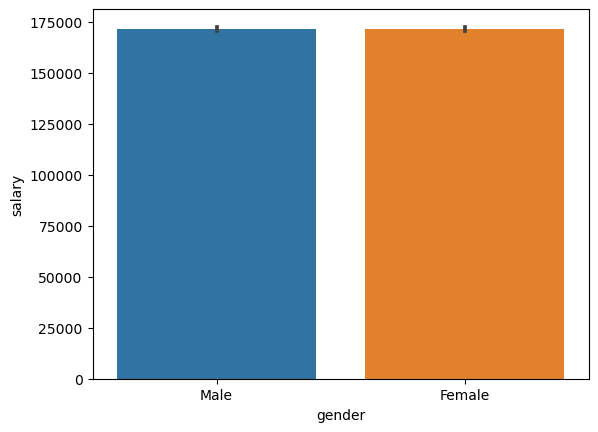

In [46]:
sns.barplot(x = 'gender', y="salary", data=percentile_95th)
plt.show()

In [47]:
np.percentile(data['salary'],75)

101565.0

# Compare Salaries by gender

### Females number more than Males yet they earn lesser total salary as a category

In [48]:
display(data['gender'].value_counts())
salayr_by_gender = display(data.groupby(['gender'])['salary'].agg(sum))

Female    5595
Male      5002
Name: gender, dtype: int64

gender
Female    3.828880e+08
Male      4.137317e+08
Name: salary, dtype: float64

In [49]:
salayr_by_gender = display(data.groupby(['gender'])['salary'].agg(np.mean))
salayr_by_gender 

gender
Female    68433.953233
Male      82713.262567
Name: salary, dtype: float64

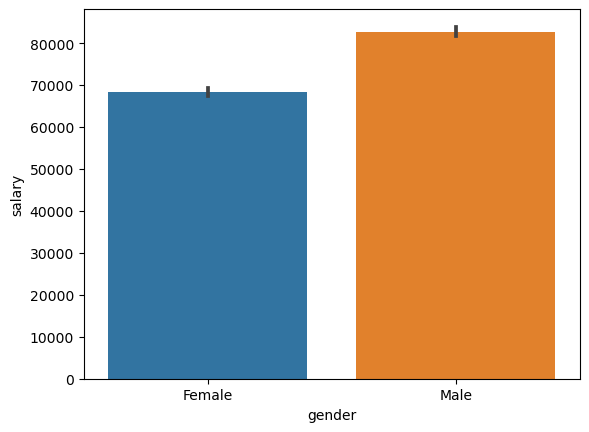

In [50]:
sns.barplot(x = 'gender', y="salary", data=data)
plt.show()

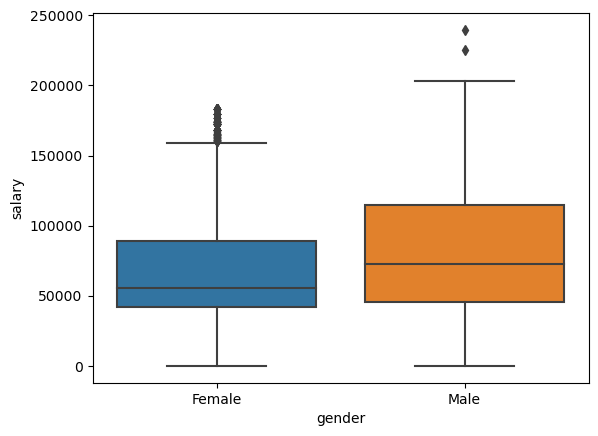

In [51]:
sns.boxplot(x = 'gender',y='salary', data=data)
plt.show()

## Distribution of Data

C:\Users\ansah\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


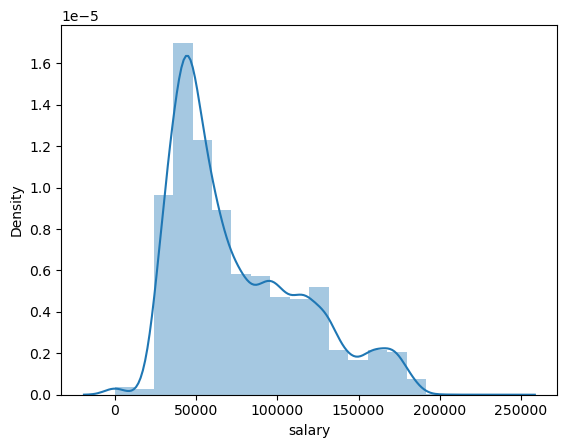

In [52]:
sns.distplot(data['salary'], bins=20)
plt.show()

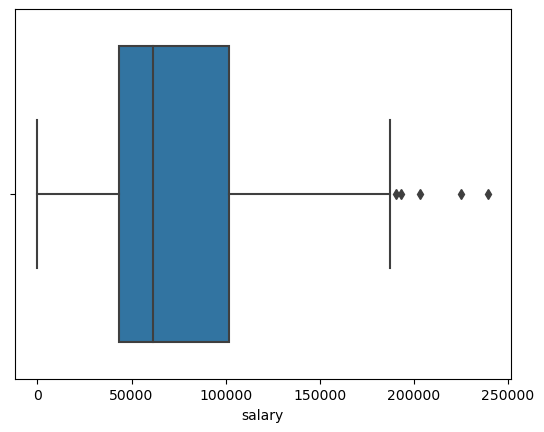

In [53]:
sns.boxplot(x=data['salary'])
plt.show()

# Average salary in the Trump Administration by gender

In [54]:
trump_data = data.loc[data['served_under'] == 'Trump Administration']


In [55]:
TrumpAdmin_salayry_by_gender =display(trump_data.groupby(['gender'])['salary'].agg(np.mean))

gender
Female     86939.264610
Male      104776.651207
Name: salary, dtype: float64

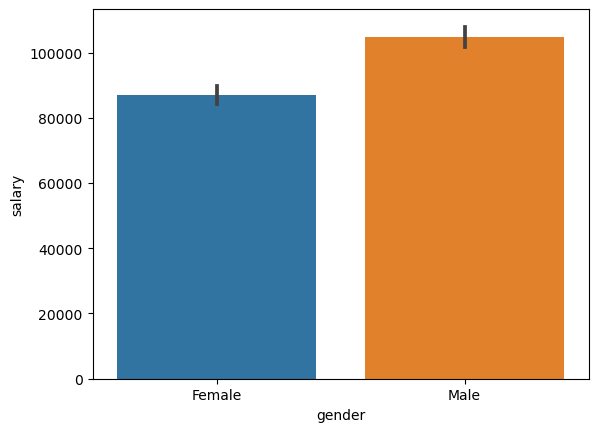

In [56]:
sns.barplot(x = 'gender', y="salary", data=trump_data)
plt.show()

# Average salary in the Obama Administration by gender

In [57]:
obama_data = data.loc[data['served_under'] == 'Obama Administration']


In [58]:
ObamaAdmin_salayry_by_gender =display(obama_data.groupby(['gender'])['salary'].agg(np.mean))

gender
Female    78840.604253
Male      86374.584437
Name: salary, dtype: float64

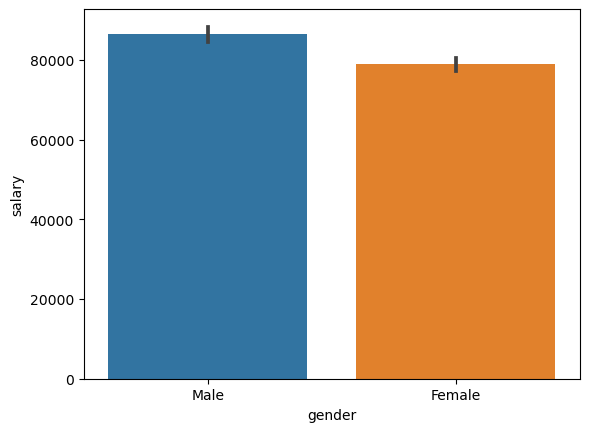

In [59]:
sns.barplot(x = 'gender', y="salary", data=obama_data)
plt.show()

#  average salary in the Clinton Administration by gender

In [60]:
clinton_data = data.loc[data['served_under'] == 'Clinton Administration']


In [61]:
ClintonAdmin_salayry_by_gender = display(clinton_data.groupby(['gender'])['salary'].agg(np.mean))

gender
Female    53539.685308
Male      63805.386297
Name: salary, dtype: float64

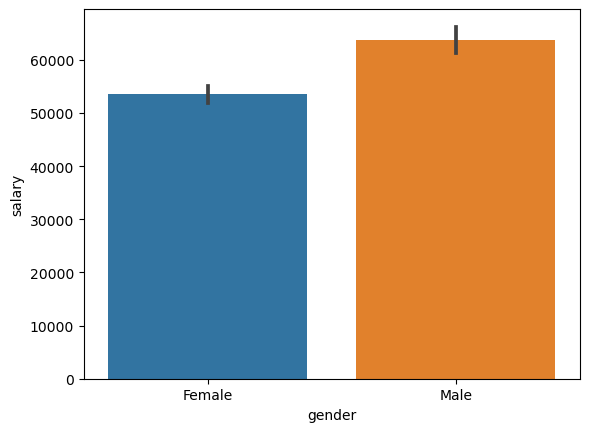

In [62]:
sns.barplot(x = 'gender', y="salary", data=clinton_data)
plt.show()

#  Average salary in the Bush Administration by gender

In [63]:
bush_data = data[(data['served_under']=="Bush administration")]

In [64]:
BushAdmin_salayry_by_gender = bush_data.groupby(['gender'])['salary'].agg(np.mean)
BushAdmin_salayry_by_gender


gender
Female    58764.695722
Male      75401.133333
Name: salary, dtype: float64

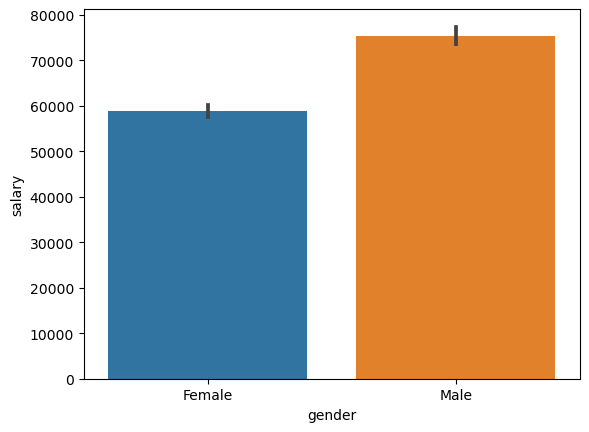

In [65]:
sns.barplot(x = 'gender', y="salary", data=bush_data)
plt.show()

# Hypothesis Testing:  gender gap in annual salaries

In [66]:
#Ho: μ1 - μ2 = 0 (There is no difference between the mean annualsalaries of Males and Females in the Whitehouse)
#H1: μ1 - μ2 != 0 (There`s difference in the mean annual salaries of females and Males in the Whitehouse)

##### sample sizes of two different samples : Female and Male

In [67]:
data["gender"].value_counts()

Female    5595
Male      5002
Name: gender, dtype: int64

##### degrees of freedom

In [68]:
Female_sample_size = 5595
Male_sample_size = 5002
degrees_freedom = (Female_sample_size + Male_sample_size) -2
degrees_freedom

10595

##### get mean salary for females

In [69]:
data_female = data[data["gender"]=="Female"]


In [70]:
mean_female_salary = data_female["salary"].mean()
mean_female_salary

68433.953233357

In [71]:
#variance female
var_female_salary = data_female["salary"].var()
var_female_salary

1318304459.9866107

##### get mean salary for males

In [72]:
data_male = data[data["gender"]=="Male"]


In [73]:
mean_male_salary = data_male["salary"].mean()
mean_male_salary

82713.26256747892

In [74]:
# Variance in salary of male
var_male_salary = data_male["salary"].var()
var_male_salary

1832444240.2566097

##### Pooled standard Error

In [75]:
pooled_sample_standard_error  = np.sqrt((var_male_salary/(Male_sample_size-1)) +(var_female_salary/(Female_sample_size-1)))
pooled_sample_standard_error 

775.9378665856635

##### difference in means of the 2 samples(female and male)

In [76]:
difference_in_means = mean_male_salary - mean_female_salary
difference_in_means

14279.309334121921

## Compute confidence interval

In [77]:
import scipy.stats
confidence_level = 0.95

confidence_interval = scipy.stats.t.interval(confidence_level, 
                                             degrees_freedom, 
                                             difference_in_means, 
                                             pooled_sample_standard_error)
confidence_interval

(12758.325305657816, 15800.293362586026)

#### With 95% confidence interval, the difference in mean of annual salaries of Females and Males in the Whitehouse is between USD 12,758-USD15,800 

In [78]:
import scipy.stats as stats
stats.ttest_ind(data_male["salary"], data_female["salary"], equal_var=True)

Ttest_indResult(statistic=18.57325801635495, pvalue=8.39451834941693e-76)

### since the p-value (8.39451834941693e-76) < alpha = 0.05 so we reject the null hypothesis of the test.
### We can confidently say there was difference in the mean annaul salaries of Females and males in the Whitehouse from 1997-2020.

In [82]:
# Save your work as a csv file.(export as csv)
data.to_csv('cleaned_whitehouse_staff_final.csv', index=False)

In [80]:
percentile_95th.to_csv('95th_percentile.csv', index=False)

In [81]:
Percentile_10Th.to_csv('10th_percentile.csv', index=False)